The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 172.31 m/s is 68.63 seconds.
The distance the bomb will travel is 16505.25 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 109.32 m/s is 77.88 seconds.
The distance the bomb will travel is 10596.93 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 18000.0 feet at a speed of 193.47 m/s is 68.63 seconds.
The distance the bomb will travel is 19659.65 feet.
The fall time for the object weapons.bombs.Mk_82 from an altitude of 22000.0 feet at a speed of 117.48 m/s is 77.88 seconds.
The distance the bomb will travel is 11619.81 feet.


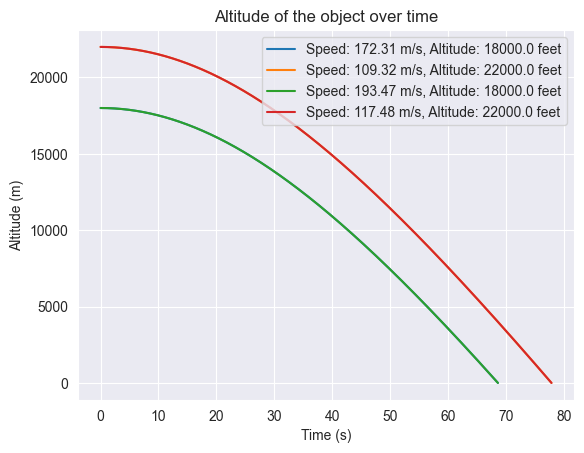

In [7]:
import math
import pandas as pd
import matplotlib.pyplot as plt

def get_user_inputs():
    speeds = []
    altitudes = []

    num_speeds = int(input("Enter the number of speeds: "))
    for i in range(num_speeds):
        speed = float(input(f"Enter speed {i+1} (in m/s): "))
        speeds.append(speed)

    num_altitudes = int(input("Enter the number of altitudes: "))
    for i in range(num_altitudes):
        altitude = float(input(f"Enter altitude {i+1} (in feet): "))
        altitudes.append(altitude)

    return speeds, altitudes
def calculate_fall_time_and_distance(file_path, speeds, altitudes):
    # Constants
    g = 9.8  # m/s^2, acceleration due to gravity
    p = 1.225  # kg/m^3, air density at sea level

    # User inputs
    object_name = input("Enter the name of the object: ")

    # Read the CSV file
    data = pd.read_csv(file_path)

    # Find the object in the CSV file
    object_data = data[data['name'] == object_name]

    if object_data.empty:
        print(f"No data found for object: {object_name}")
        return

    # Calculate the fall time for the object
    m = object_data['mass'].values[0]  # mass in kg
    caliber = object_data['caliber'].values[0]  # caliber in meters
    A = math.pi * (caliber / 2) ** 2  # cross-sectional area in m^2
    Cd = object_data['caliber'].values[0]

    for plane_speed in speeds:
        for release_altitude_feet in altitudes:
            # Convert release altitude to meters
            release_altitude = release_altitude_feet 

            # Initial conditions
            v = 0  # start at rest
            h = release_altitude  # start at release altitude
            t = 0  # start at time 0
            dt = 0.01  # time step
            s = 0  # start at position 0

            time_values = []
            altitude_values = []

            # Euler method to solve the equation of motion
            while h > 0:
                drag_force = 0.5 * p * v**2 * Cd * A
                acceleration = g - drag_force / m
                v += acceleration * dt
                h -= v * dt
                t += dt

                # Update horizontal speed and position
                drag_force_horizontal = 0.5 * p * plane_speed**2 * Cd * A
                plane_speed -= drag_force_horizontal / m * dt
                s += plane_speed * dt

                # Store the values for plotting
                time_values.append(t)
                altitude_values.append(h)

            print(f"The fall time for the object {object_name} from an altitude of {round(release_altitude_feet, 2)} feet at a speed of {round(plane_speed, 2)} m/s is {round(t, 2)} seconds.")
            print(f"The distance the bomb will travel is {round(s, 2)} feet.")

            # Plot altitude over time
            plt.plot(time_values, altitude_values, label=f'Speed: {round(plane_speed, 2)} m/s, Altitude: {round(release_altitude_feet, 2)} feet')
    
    # Move the legend to the upper right corner
    plt.legend(loc='upper right')

    plt.xlabel('Time (s)')
    plt.ylabel('Altitude (m)')
    plt.title('Altitude of the object over time')
    plt.show()
# Replace 'your_file.csv' with your actual csv file path
# Replace 'plane_speed' with the actual speed of the plane in m/s
speeds, altitudes = get_user_inputs()
calculate_fall_time_and_distance('C:/Users/zacha/Documents/plsc 309/weapon_data.csv', speeds, altitudes)